In [11]:
#函数
import numpy as np
def schaffer(p):
    x1,x2=p
    x=np.square(x1)+np.square(x2)
    return 0.5+(np.sin(x)-0.5)/np.square(1+x)

In [12]:
from sko.GA import GA
ga=GA(func=schaffer,n_dim=2,size_pop=50,max_iter=800,
      lb=[-1,-1],ub=[1,1],precision=1e-7)
best_x,best_y=ga.run()
print('best_x:',best_x,'\n','best_y:',best_y)

best_x: [-2.98023233e-08  2.98023233e-08] 
 best_y: [3.55271368e-15]


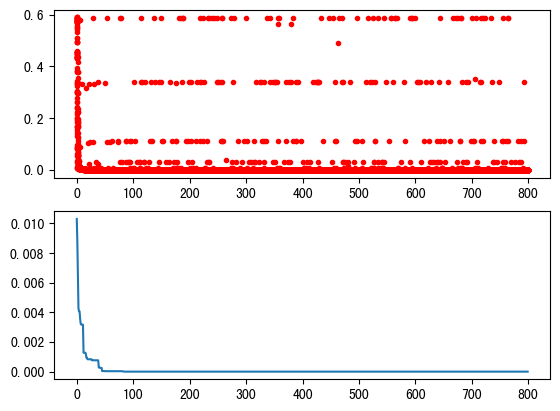

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

Y_history=pd.DataFrame(ga.all_history_Y)
fig,ax=plt.subplots(2,1)
ax[0].plot(Y_history.index,Y_history.values,'.',color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

[0.22399741404855908, 0.22206731145022748, 0.21528868666865666, 0.21083675204235938, 0.21083675204235938, 0.20651778989153638, 0.20600098415928378, 0.2057067320139767, 0.2057067320139767, 0.2006116846933366, 0.2006116846933366, 0.2006116846933366, 0.19736524120105953, 0.19736524120105953, 0.19736524120105953, 0.18512838439527776, 0.18512838439527776, 0.18512838439527776, 0.18512838439527776, 0.18512838439527776, 0.18512838439527776, 0.18512838439527776, 0.17463861169519032, 0.17463861169519032, 0.17463861169519032, 0.1738623077347942, 0.1732989602124093, 0.1732989602124093, 0.1732036009585177, 0.17124670432111996, 0.17035315598123338, 0.16864950181756286, 0.16778647687737522, 0.1645161758581085, 0.1645161758581085, 0.15979358197766722, 0.15979358197766722, 0.15979358197766722, 0.15979358197766722, 0.15889401091669467, 0.15889401091669467, 0.15889401091669467, 0.157304169294717, 0.157304169294717, 0.157304169294717, 0.15102311472182725, 0.15102311472182725, 0.14854539230474967, 0.148545

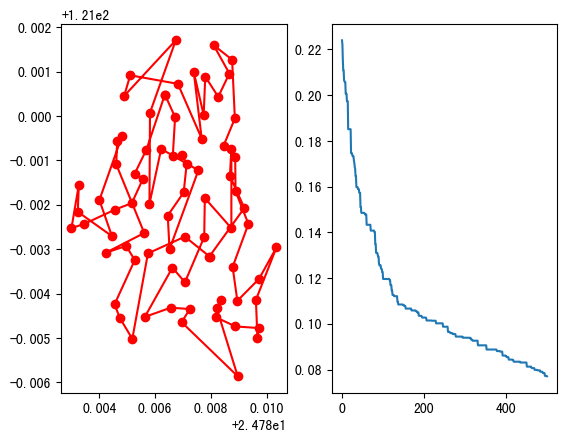

In [10]:
#tsp
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

file_name='nctu.csv'
points_coordinate=np.loadtxt(file_name,delimiter=',')
num_points=points_coordinate.shape[0]
distance_matrix=spatial.distance.cdist(points_coordinate,points_coordinate,metric='euclidean')

def cal_total_distance(routine):
    num_points,=routine.shape
    return sum([distance_matrix[routine[i%num_points],routine[(i+1)%num_points]] for i in range(num_points)])

from sko.GA import GA_TSP

ga_tsp=GA_TSP(func=cal_total_distance,n_dim=num_points,size_pop=50,
             max_iter=500,prob_mut=1)
best_points,best_distance=ga_tsp.run()
print(ga_tsp.generation_best_Y)
# asd
fig,ax=plt.subplots(1,2)
best_points_=np.concatenate([best_points,[best_points[0]]])
best_points_coordinate=points_coordinate[best_points_,:]
ax[0].plot(best_points_coordinate[:,0],best_points_coordinate[:,1],'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()

运行时间是: 39.74073s
最优路线： [74, 64, 43, 60, 31, 41, 28, 44, 46, 68, 71, 24, 30, 42, 39, 35, 20, 48, 23, 13, 15, 12, 14, 19, 22, 21, 47, 66, 29, 17, 18, 16, 76, 2, 73, 53, 6, 7, 52, 1, 69, 51, 5, 10, 8, 9, 11, 65, 57, 62, 3, 4, 38, 40, 58, 78, 77, 72, 63, 33, 55, 56, 59, 67, 70, 25, 36, 61, 50, 49, 75, 27, 32, 37, 34, 45, 54, 26, 74]
最优值： [0.05655404]


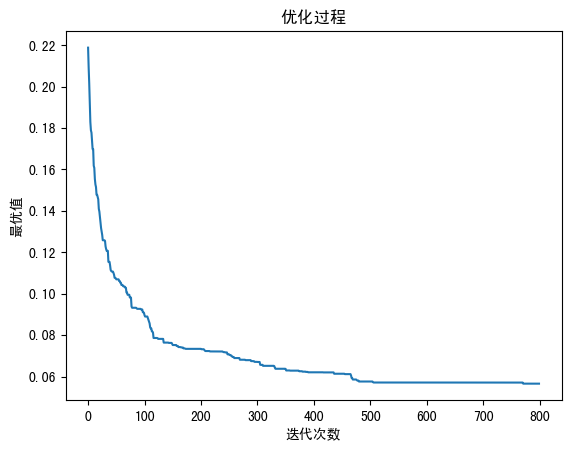

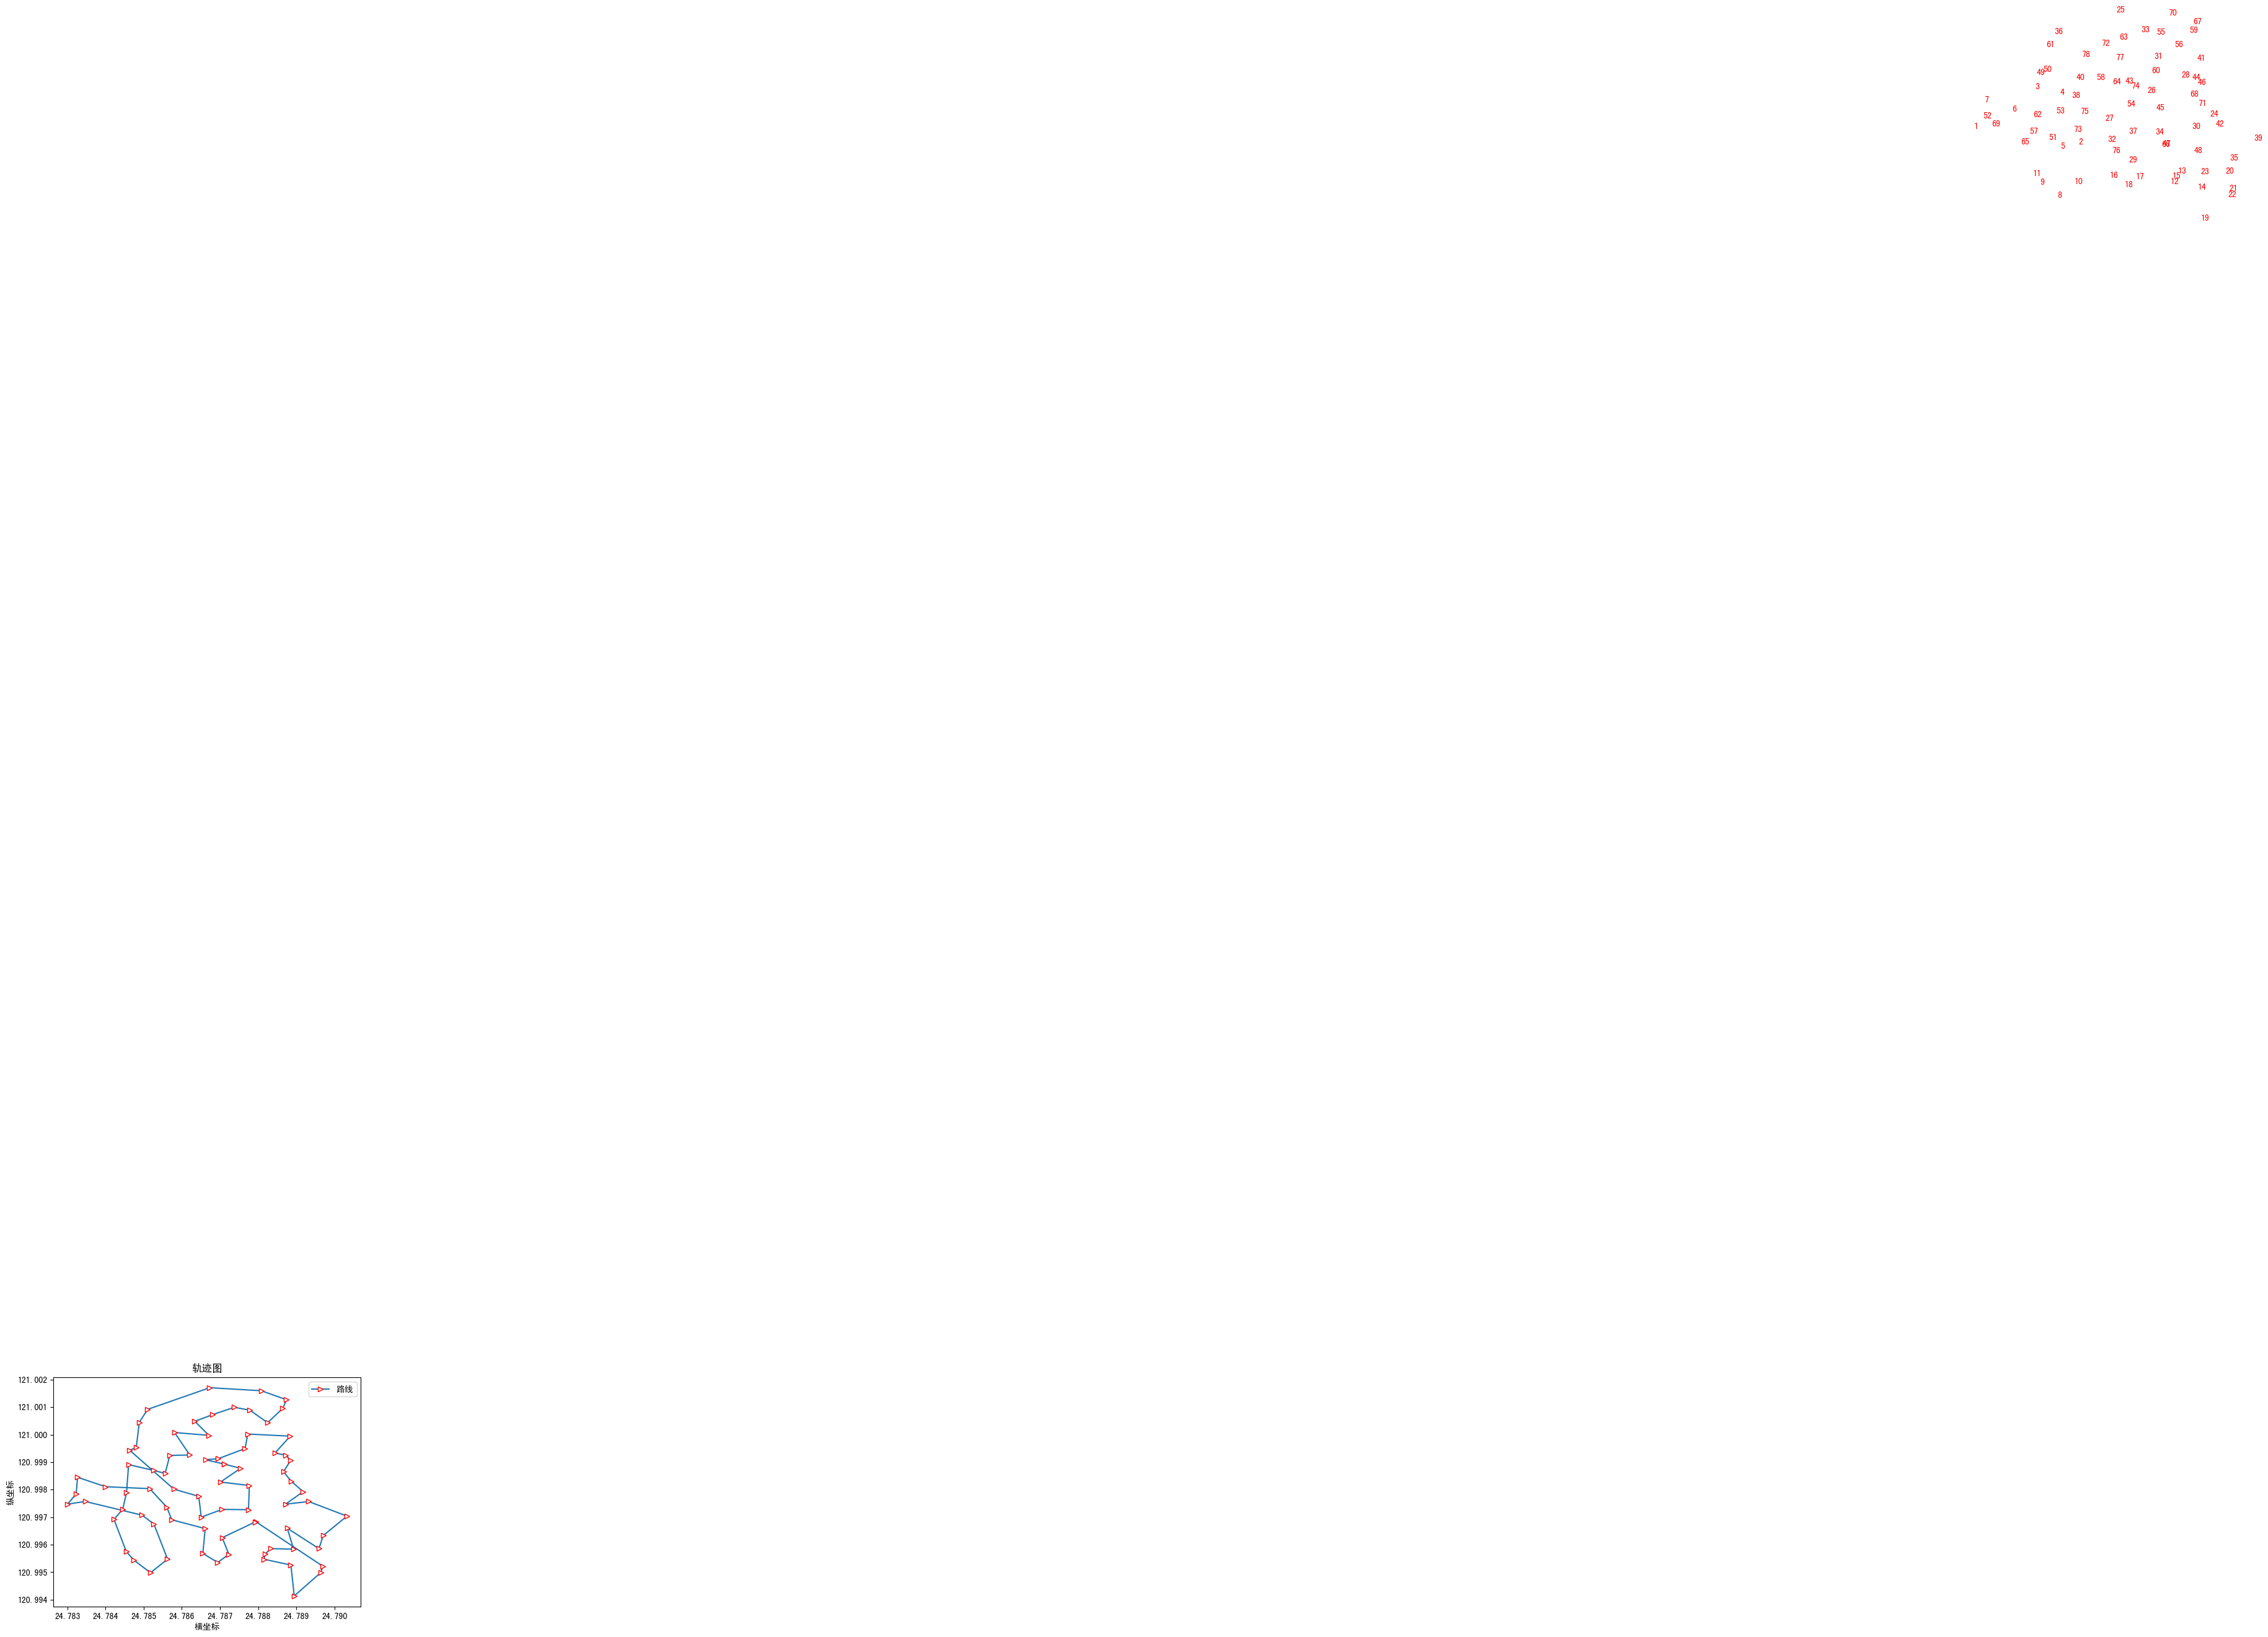

In [3]:
#粒子群(PSO)算法求解31城市TSP问题完整代码：
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sko.PSO import PSO_TSP
from time import perf_counter

def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

def print_route(best_points):
    result_cur_best=[]
    for i in best_points:
        result_cur_best+=[i]
    for i in range(len(result_cur_best)):
        result_cur_best[i] += 1
    result_path = result_cur_best
    result_path.append(result_path[0])
    return result_path

if __name__=="__main__":
    file_name = './nctu.csv'        #城市坐标数据
    points_coordinate = np.loadtxt(file_name, delimiter=',')
    num_points = points_coordinate.shape[0]
    distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
    
    start=perf_counter()       #计时开始
    # 执行粒子群(PSO)算法
    pso_tsp = PSO_TSP(func=cal_total_distance, n_dim=num_points, size_pop=200, max_iter=800, w=0.8, c1=0.1, c2=0.1)

    # 结果输出
    best_points, best_distance = pso_tsp.run()
    print("运行时间是: {:.5f}s".format(perf_counter()-start))   #计时结束
    print("最优路线：", print_route(best_points))
    print("最优值：", best_distance)

    # 绘图
    best_points_ = np.concatenate([best_points, [best_points[0]]])
    best_points_coordinate = points_coordinate[best_points_, :]

    plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
    plt.rcParams['axes.unicode_minus'] = False
    fig1, ax1 = plt.subplots(1, 1)
    ax1.set_title('优化过程', loc='center')
    ax1.plot(pso_tsp.gbest_y_hist)
    ax1.set_xlabel("迭代次数")
    ax1.set_ylabel("最优值")

    fig2, ax2 = plt.subplots(1, 1)
    ax2.set_title('轨迹图', loc='center')
    line=ax2.plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], marker='>', mec='r', mfc='w',label=u'路线')
    ax2.legend()  # 让图例生效
    for i in range(num_points):
        plt.text(best_points_coordinate[:, 0][i] + 0.05, best_points_coordinate[:, 1][i] + 0.05, str(best_points[i]+1), color='red')
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax2.set_xlabel("横坐标")
    ax2.set_ylabel("纵坐标")
    plt.show()

